In [142]:
import curvedsky
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import matplotlib as mpl
mpl.rcParams['font.size']=12
import pandas as pd

In [143]:
from orphics import cosmology, maps

In [144]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) 
import param as p
import importlib

In [145]:
importlib.reload(p)

<module 'param' from '/global/cscratch1/sd/hongbo/lens_rot_bias/param.py'>

In [166]:
experiment = 'CMB_S3'

In [167]:
params = p.exps_config[experiment]

In [168]:
ellmin = 30
ellmax = 3000

In [169]:
theory = cosmology.default_theory()
ells = np.arange(ellmax+1)
clee, clbb = theory.lCl('EE', ells), theory.lCl('BB', ells)

In [170]:
nlee = (params['nlev_p']*np.pi/180/60)**2/maps.gauss_beam(ells, params['beam_arcmin'])**2

In [171]:
oclee = clee + nlee
n0_ee_kk = curvedsky.norm_quad.qee('lens', ellmax,
                             ellmin, ellmax, clee[:ellmax+1], oclee[:ellmax+1],
                             lfac='k')[0]

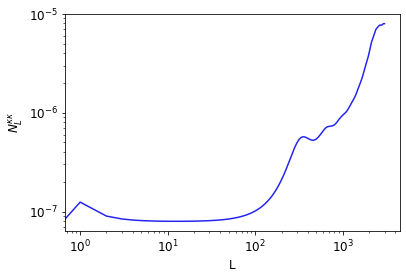

In [172]:
plt.plot(ells, n0_ee_kk)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('L')
plt.ylabel('$N_L^{\kappa \kappa}$')
pd.DataFrame({'ells':ells, 'n0_ee_kk':n0_ee_kk}).to_csv('n0_ee_kk_%s.csv'%experiment, index=False)